<a href="https://colab.research.google.com/github/cylanokim/Data_Analysis/blob/main/Kaggle_analysis/LSTM_Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What was the change in price of the stock overtime?
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [9]:
!pip install yfinance
# https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [12]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
print(start)
print(end)

2012-07-23 00:00:00
2022-07-23 12:32:57.040669


In [13]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"] 

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name 

df = pd.concat(company_list, axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.438766,487975600,APPLE
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.349905,565132400,APPLE
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.557482,877312800,APPLE
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.554739,406632800,APPLE
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.868649,403936400,APPLE


In [15]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,56.678925,57.305520,56.071332,56.713067,54.970646,1.909010e+08
std,45.398882,45.988497,44.829455,45.436775,46.054504,1.494694e+08
min,13.856071,14.271429,13.753571,13.947500,12.101386,4.100000e+07
25%,24.969999,25.182501,24.722500,24.992144,22.771473,9.648600e+07
50%,38.302502,38.497501,37.877499,38.285000,36.354343,1.376828e+08
75%,68.967499,69.980003,67.732498,68.787498,67.725998,2.291920e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.460852e+09


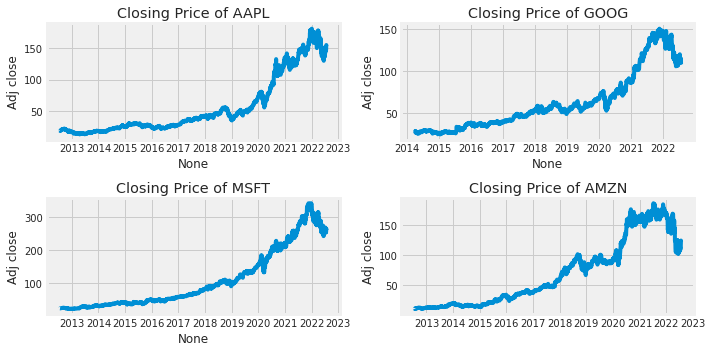

In [16]:
fig = plt.figure(figsize=(10,5))
# plt.subplots_adjust(top=1.25, bottom=1.2)
ax1 = fig.add_subplot(221)
ax1.plot(company_list[0]['Adj Close'])
ax1.set_ylabel('Adj close')
ax1.set_xlabel('None')
ax1.set_title(f'Closing Price of {tech_list[0]}')

ax2 = fig.add_subplot(222)
ax2.plot(company_list[1]['Adj Close'])
ax2.set_ylabel('Adj close')
ax2.set_xlabel('None')
ax2.set_title(f'Closing Price of {tech_list[1]}')

ax3 = fig.add_subplot(223)
ax3.plot(company_list[2]['Adj Close'])
ax3.set_ylabel('Adj close')
ax3.set_xlabel('None')
ax3.set_title(f'Closing Price of {tech_list[2]}')

ax4 = fig.add_subplot(224)
ax4.plot(company_list[3]['Adj Close'])
ax4.set_ylabel('Adj close')
ax4.set_xlabel(None)
ax4.set_title(f'Closing Price of {tech_list[3]}')

plt.tight_layout()
plt.show()

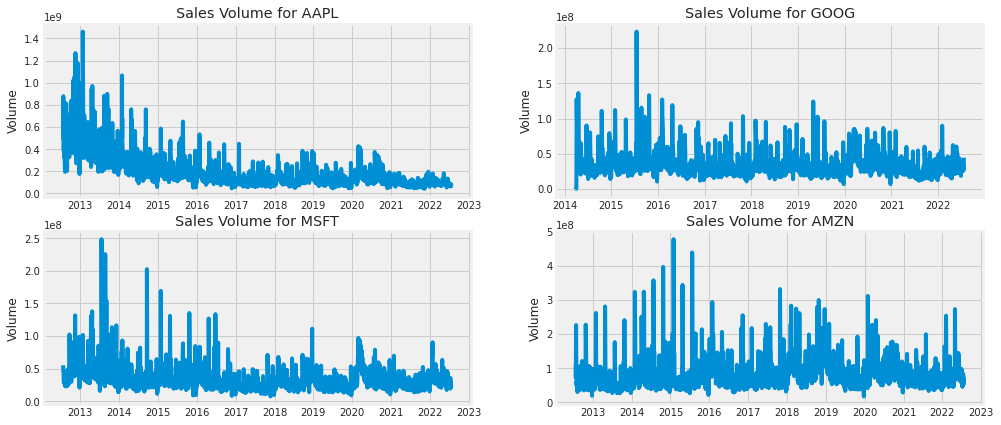

In [17]:
plt.figure(figsize=(15,7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    plt.plot(company['Volume'])
    plt.xlabel(None)
    plt.ylabel('Volume') 
    plt.title(f'Sales Volume for {tech_list[i-1]}')


# 2. What was the moving average of the various the stocks? 

In [18]:
# DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(window=ma).mean()

company_list[0].head(-10)

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.438766,487975600,APPLE,NaN,NaN,NaN
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.349905,565132400,APPLE,NaN,NaN,NaN
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.557482,877312800,APPLE,NaN,NaN,NaN
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.554739,406632800,APPLE,NaN,NaN,NaN
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.868649,403936400,APPLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,136.039993,139.039993,135.660004,138.929993,138.929993,71007500,APPLE,137.669000,138.739001,146.297982
2022-07-05,137.770004,141.610001,136.929993,141.559998,141.559998,73353800,APPLE,138.669000,138.548000,145.805666
2022-07-06,141.350006,144.119995,141.080002,142.919998,142.919998,74064300,APPLE,139.374001,138.387000,145.433013


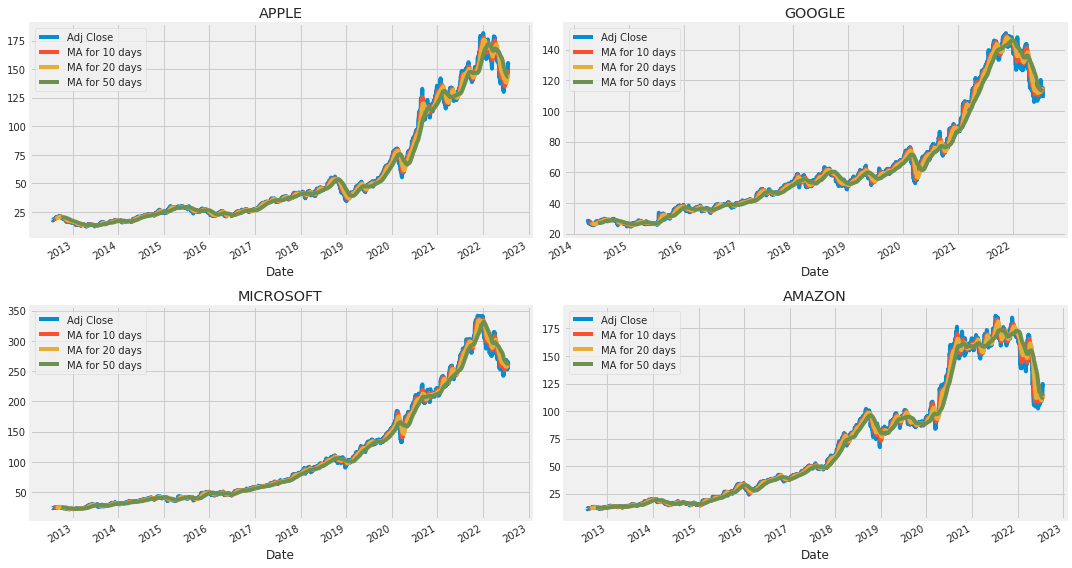

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

What was the daily return of the stock on average

In [20]:
# DataFrame.pct_change(periods=1, fill_method='pad', limit=None, freq=None, kwargs) 
# (다음행 - 현재행)÷현재행

In [21]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

company_list[0].tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-07-18,150.740005,151.570007,146.699997,147.070007,147.070007,81420900,APPLE,145.980000,141.8245,143.357001,-0.020643
2022-07-19,147.919998,151.229996,146.910004,151.000000,151.000000,82982400,APPLE,146.924001,142.7965,143.246201,0.026722
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400,APPLE,147.936000,143.6550,143.161400,0.013510
2022-07-21,154.500000,155.570007,151.940002,155.350006,155.350006,65086600,APPLE,148.836000,144.6550,143.227201,0.015094
2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400,APPLE,149.541000,145.4460,143.218801,-0.008111


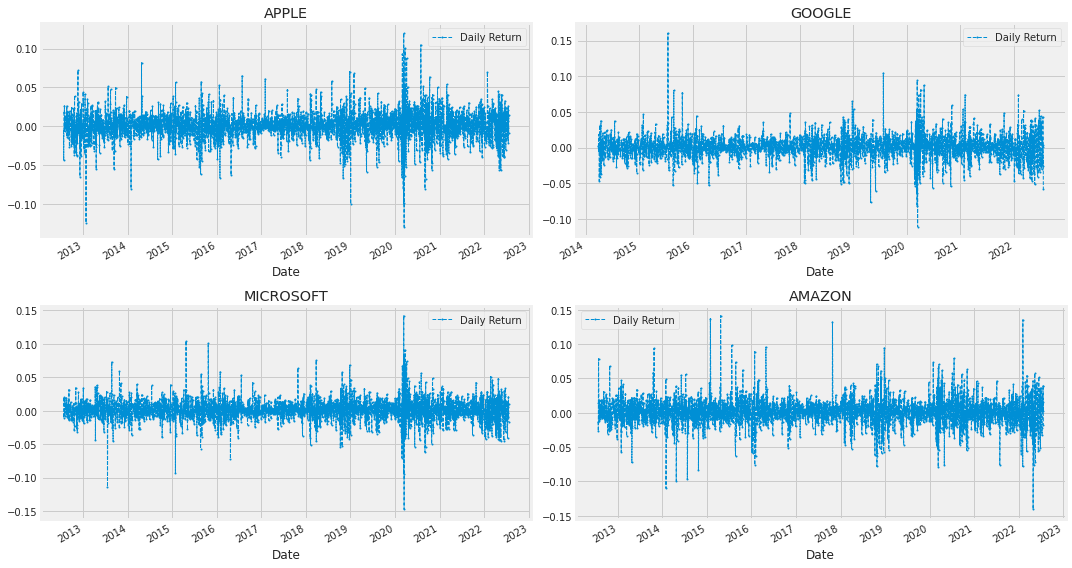

In [22]:
# Then we will plot the daily retunr percentage 
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', linewidth=1, markersize=1)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', linewidth=1, markersize=1)
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', linewidth=1, markersize=1)
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', linewidth=1, markersize=1)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

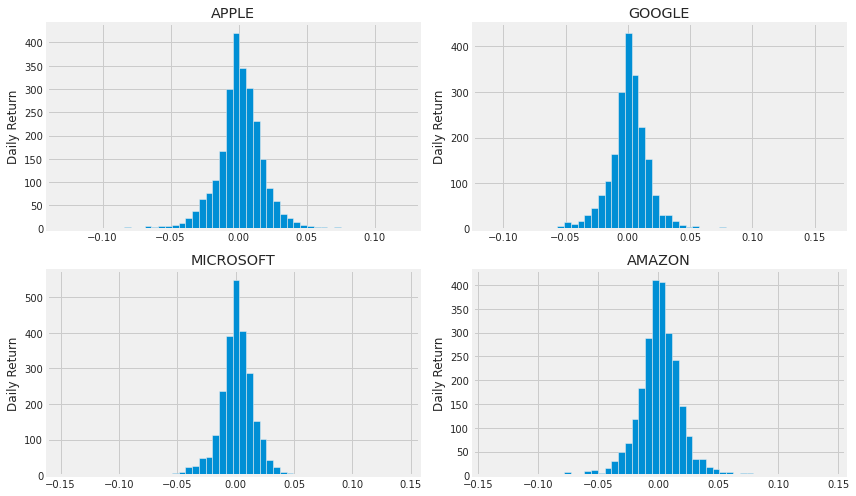

In [23]:
plt.figure(figsize=(12,7)) 

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50) 
    plt.ylabel('Daily Return') 
    plt.title(f'{company_name[i-1]}') 

plt.tight_layout()

4. What was the correlation bet different stocks closing prices? 

In [24]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [25]:
len(company_list)

4

In [26]:
df_closing = pd.DataFrame()

for name, data in zip(tech_list, company_list):
    df_closing[name] = data['Adj Close']

df_closing

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2012-07-23,18.438766,NaN,23.906784,11.300500
2012-07-24,18.349905,NaN,23.800638,11.152000
2012-07-25,17.557482,NaN,23.539360,10.852500
2012-07-26,17.554739,NaN,23.808807,11.000500
2012-07-27,17.868649,NaN,24.298697,11.866000
...,...,...,...,...
2022-07-18,147.070007,109.910004,254.250000,113.760002
2022-07-19,151.000000,114.620003,259.529999,118.209999
2022-07-20,153.039993,114.699997,262.269989,122.769997


In [27]:
tech_rets = df_closing.pct_change()
tech_rets

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2012-07-23,NaN,NaN,NaN,NaN
2012-07-24,-0.004819,NaN,-0.004440,-0.013141
2012-07-25,-0.043184,NaN,-0.010978,-0.026856
2012-07-26,-0.000156,NaN,0.011447,0.013637
2012-07-27,0.017882,NaN,0.020576,0.078678
...,...,...,...,...
2022-07-18,-0.020643,-0.025335,-0.009621,0.001849
2022-07-19,0.026722,0.042853,0.020767,0.039117
2022-07-20,0.013510,0.000698,0.010558,0.038575


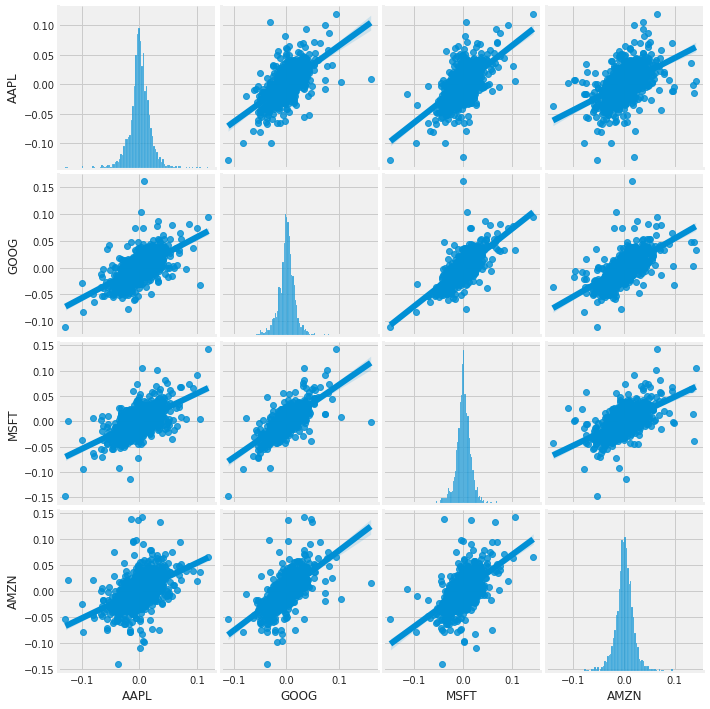

In [28]:
import seaborn as sns 
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'percent to change')

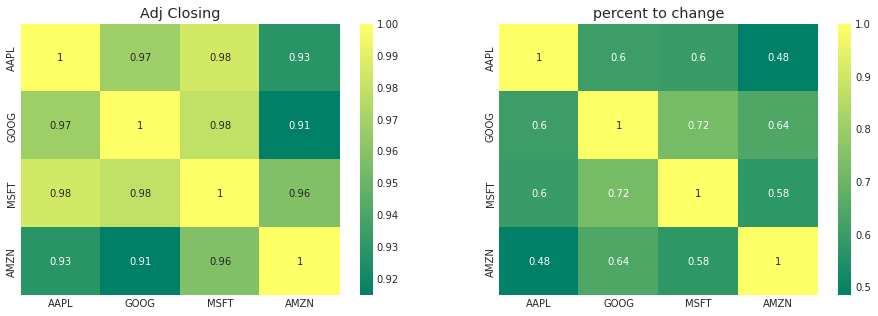

In [29]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
sns.heatmap(df_closing.corr(), annot=True, cmap='summer')
plt.title('Adj Closing')
ax2 = fig.add_subplot(122)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('percent to change')


In [ ]:
# A quick glance shows an interesing correlation bet Goo and  Ama daily returns. 

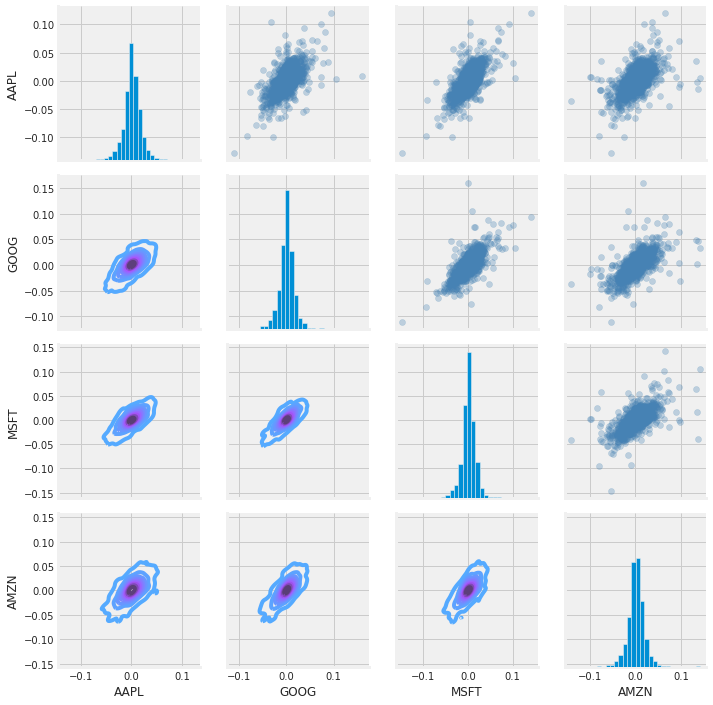

In [30]:
fig = sns.PairGrid(tech_rets.dropna())

fig.map_upper(plt.scatter, color='steelblue', alpha=0.3)
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(plt.hist, bins=30)

plt.show()

5. How much value do we put at risk by investing in a particular stock? 

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with standard deviation of the daily returns.

Text(0, 0.5, 'Risk')

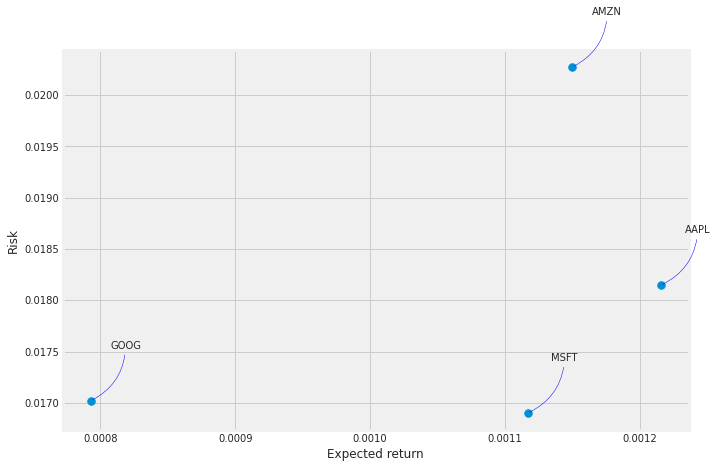

In [32]:
rets = tech_rets.dropna()

area = np.pi*20 

plt.figure(figsize=(10,7))
plt.scatter(rets.mean(), rets.std(), s=area)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.xlabel('Expected return')
plt.ylabel('Risk')

In [33]:
# Get the stock quote
company_list

[                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2012-07-23   21.228571   21.639286   20.989643   21.565357   18.438766   
 2012-07-24   21.692142   21.774286   21.375357   21.461430   18.349905   
 2012-07-25   20.516430   20.742857   20.357143   20.534643   17.557482   
 2012-07-26   20.705713   20.728571   20.370001   20.531429   17.554739   
 2012-07-27   20.536072   20.922501   20.413929   20.898571   17.868649   
 ...                ...         ...         ...         ...         ...   
 2022-07-18  150.740005  151.570007  146.699997  147.070007  147.070007   
 2022-07-19  147.919998  151.229996  146.910004  151.000000  151.000000   
 2022-07-20  151.119995  153.720001  150.369995  153.039993  153.039993   
 2022-07-21  154.500000  155.570007  151.940002  155.350006  155.350006   
 2022-07-22  155.389999  156.279999  153.410004  154.089996  154.089996   
 
                Volume 

In [34]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [35]:
df_AAPL = company_list[0]
df_AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.438766,487975600,APPLE,NaN,NaN,NaN,NaN
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.349905,565132400,APPLE,NaN,NaN,NaN,-0.004819
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.557482,877312800,APPLE,NaN,NaN,NaN,-0.043184
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.554739,406632800,APPLE,NaN,NaN,NaN,-0.000156
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.868649,403936400,APPLE,NaN,NaN,NaN,0.017882


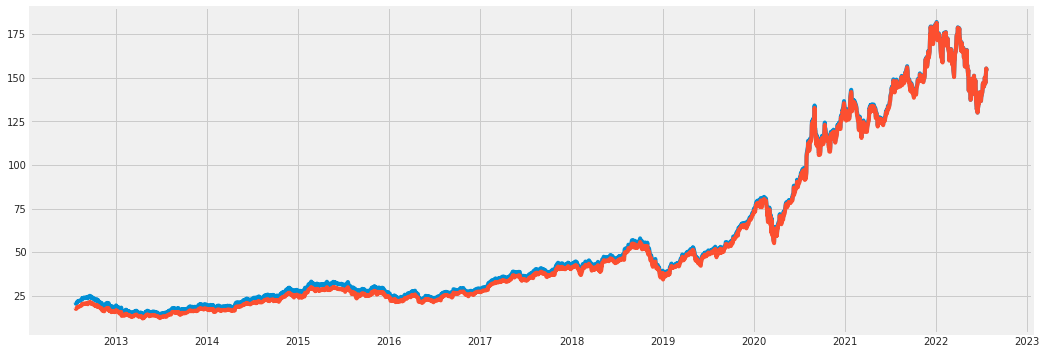

In [36]:
plt.figure(figsize=(16,6))
plt.plot(df_AAPL['Close'])
plt.plot(df_AAPL['Adj Close'])

In [94]:
data = df_AAPL.filter(['Close']) # same as df_AAPL[['Close']]
training_data_len = data.shape[0]
training_data_len

2517

In [38]:
#scale the data 
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.04532753],
       [0.04470914],
       [0.0391946 ],
       ...,
       [0.82762364],
       [0.8413686 ],
       [0.83387133]])

In [143]:
train_data = scaled_data.reshape(-1, scaled_data.shape[0])
train_data

array([[0.04532753, 0.04470914, 0.0391946 , ..., 0.82762364, 0.8413686 ,
        0.83387133]])

In [40]:
train_data.shape

(1, 2517)

In [118]:
train_data = data.values.reshape(-1, scaled_data.shape[0])
train_data

array([[ 21.56535721,  21.4614296 ,  20.53464317, ..., 153.03999329,
        155.3500061 , 154.08999634]])

In [119]:
train_data.shape

(1, 2517)

In [121]:
# # unscale

# x_total = [] 
# y_total = []

# for i in range(60, train_data.shape[1]):
#     x_total.append(train_data[0,i-60:i])
#     y_total.append(train_data[0,i])

# x_total = np.array(x_total)
# y_total = np.array(y_total)


In [144]:
# Create the training data set 
# Create the scaled training data set 
# 0~60 data --> 60 / 1~61 --> 61 과거의 data로 미래를 예측한다.
x_total = [] 
y_total = []

for i in range(60, train_data.shape[1]):
    x_total.append(train_data[0, i-60:i])
    y_total.append(train_data[0, i])

x_total = np.array(x_total)
y_total = np.array(y_total)

In [145]:
border = int(x_total.shape[0] * 0.8)

x_train = x_total[:border]
x_test = x_total[border:]

y_train = y_total[:border]
y_test = y_total[border:] 

In [146]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1965, 60), (492, 60), (1965,), (492,))

In [148]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM 

# BUILD the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(64, return_sequences=False)) 
model.add(Dense(25))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [149]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1965/1965 [==============================] - 76s 37ms/step - loss: 3.9324e-04


In [151]:
y_pred = model.predict(x_test) 

rmse = np.sqrt(np.mean((y_pred - y_test)**2))
rmse

0.16033274649503576

In [86]:
y_pred_unscale = scaler.inverse_transform(y_pred)


In [132]:
y_test.shape, y_train.shape

((492,), (1965,))

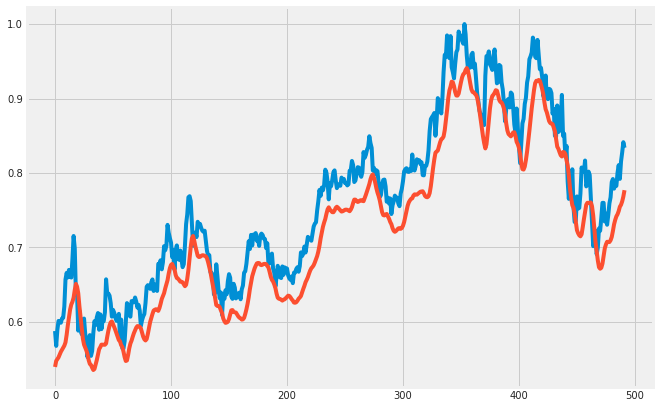

In [155]:
plt.figure(figsize=(10,7))
plt.plot(y_test)
plt.plot(y_pred)